# Principal Component Analysis

## On fake data

Re-do the example in the exercise set using Python

In [1]:
import numpy as np

In [2]:
# define data
x1 = np.array([2.0, 4.0, 12.0, 12.0, 14.0, 16.0])
x2 = np.array([-0.4, -0.8, -2.4, -2.4, -2.8, -3.2])
x3 = np.array([0.1, -0.1, -0.5, 0.5, -0.1, 0.1])
X = np.array([x1, x2, x3])
X

array([[ 2. ,  4. , 12. , 12. , 14. , 16. ],
       [-0.4, -0.8, -2.4, -2.4, -2.8, -3.2],
       [ 0.1, -0.1, -0.5,  0.5, -0.1,  0.1]])

In [3]:
# standardize data
x1_std = (x1 - np.mean(x1)) / np.std(x1)
x2_std = (x2 - np.mean(x2)) / np.std(x2)
x3_std = (x3 - np.mean(x3)) / np.std(x3)
X_STD = np.array([x1_std, x2_std, x3_std])
X_STD.round(3)

array([[-1.549, -1.162,  0.387,  0.387,  0.775,  1.162],
       [ 1.549,  1.162, -0.387, -0.387, -0.775, -1.162],
       [ 0.333, -0.333, -1.667,  1.667, -0.333,  0.333]])

In [4]:
# compute covariance matrix
cov = np.cov([x1_std, x2_std, x3_std])
cov.round(3)

array([[ 1.2, -1.2,  0. ],
       [-1.2,  1.2, -0. ],
       [ 0. , -0. ,  1.2]])

In [5]:
# compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(cov)
print(eig_val.round(3))

[2.4 0.  1.2]


In [6]:
# explain variance
expl = eig_val / np.sum(eig_val)
print(expl.round(3))

[0.667 0.    0.333]


In [7]:
# eigenvectors
print('Eigen vectors:')
print(eig_vec.round(3))
compontent1 = eig_vec[:, 0]
compontent2 = eig_vec[:, 1]
compontent3 = eig_vec[:, 2]
print('Component 1:')
print(compontent1.round(3))
# ignore component 2 (0% variance explained)
print('Component 3:')
print(compontent3.round(3))
compontents = np.array([compontent1, compontent3])

Eigen vectors:
[[ 0.707 -0.707 -0.   ]
 [-0.707 -0.707  0.   ]
 [ 0.     0.     1.   ]]
Component 1:
[ 0.707 -0.707  0.   ]
Component 3:
[-0.  0.  1.]


In [8]:
# project data
X_PROJ = compontents @ X_STD
X_PROJ.round(3)

array([[-2.191, -1.643,  0.548,  0.548,  1.095,  1.643],
       [ 0.333, -0.333, -1.667,  1.667, -0.333,  0.333]])

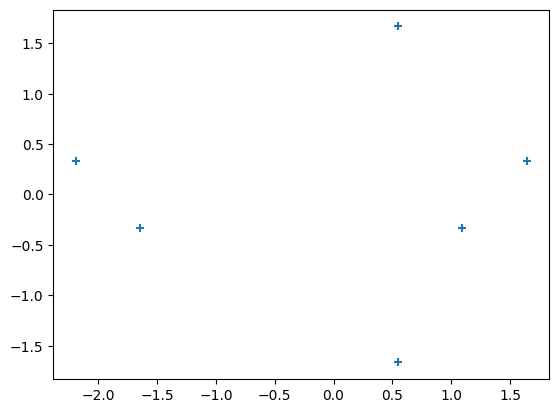

In [9]:
# plot data
import matplotlib.pyplot as plt
plt.scatter(X_PROJ[0], X_PROJ[1], marker='+')
plt.show()

Redo without standardization

Covariance matrix:
[[32.    -6.4    0.   ]
 [-6.4    1.28  -0.   ]
 [ 0.    -0.     0.108]]
Eigen values:
[33.28   0.     0.108]
Explained variance:
[0.997 0.    0.003]
Component 1:
[ 0.981 -0.196  0.   ]
Component 2:
[-0.196 -0.981  0.   ]
Component 3:
[0. 0. 1.]
Projected data:
[[ 2.04   4.079 12.238 12.238 14.277 16.317]
 [ 0.1   -0.1   -0.5    0.5   -0.1    0.1  ]]


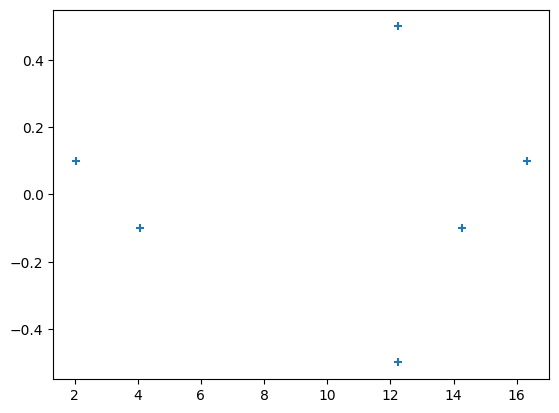

In [10]:
# compute covariance matrix
cov = np.cov([x1, x2, x3])
print('Covariance matrix:')
print(cov.round(3))

# compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(cov)
print('Eigen values:')
print(eig_val.round(3))

# compute explained variance
expl = eig_val / np.sum(eig_val)
print('Explained variance:')
print(expl.round(3))

# compute components
compontent1 = eig_vec[:, 0]
compontent2 = eig_vec[:, 1]
compontent3 = eig_vec[:, 2]
print('Component 1:')
print(compontent1.round(3))
print('Component 2:')
print(compontent2.round(3))
print('Component 3:')
print(compontent3.round(3))

# project data
compontents = np.array([compontent1, compontent3])
X_PROJ2 = compontents @ X
print('Projected data:')
print(X_PROJ2.round(3))

# plot data
plt.scatter(X_PROJ2[0], X_PROJ2[1], marker='+')
plt.show()

## On a pizza dataset
Link to data (from data.world): https://data.world/sdhilip/pizza-datasets

Or (from Google Drive): https://drive.google.com/file/d/1w1x2r2FckkdVX9Pte9lTcbjyFTG35T6C/view?usp=sharing

Or (from GitHub): https://github.com/pauldubois98/RefresherMaths2023/blob/main/ExercisesSet5/pizza.csv

![pizza database illustration](pizza.png)

Step -1: Imports libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 0: Read data

In [12]:
df = pd.read_csv('pizza.csv')
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


Put your data of interest in a matrix `X`

In [13]:
X = df[['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']]
X.shape

(300, 7)

Step 1: Standardize data

In [14]:
means = X.mean(axis=0)
stds = X.std(axis=0)
X = (X - means) / stds
X.head()

,mois,prot,fat,ash,sodium,carb,cal
0,-1.369526,1.252089,2.745255,1.950635,2.971721,-1.225463,2.675659
1,-1.299391,1.225669,2.636070,2.131776,3.025723,-1.211598,2.530505
2,-1.314046,1.028292,2.846640,1.927007,2.593708,-1.223800,2.707915
3,-1.083752,1.053158,2.551397,1.698611,2.539707,-1.191630,2.369224
4,-1.090033,1.228777,2.386506,1.722238,2.620709,-1.170554,2.256327


Step 2: Compute covariance matrix

In [15]:
C = np.cov(X.T)
C.round(3)

array([[ 1.   ,  0.36 , -0.171,  0.266, -0.102, -0.592, -0.764],
       [ 0.36 ,  1.   ,  0.498,  0.824,  0.429, -0.854,  0.07 ],
       [-0.171,  0.498,  1.   ,  0.792,  0.933, -0.64 ,  0.765],
       [ 0.266,  0.824,  0.792,  1.   ,  0.808, -0.899,  0.326],
       [-0.102,  0.429,  0.933,  0.808,  1.   , -0.62 ,  0.672],
       [-0.592, -0.854, -0.64 , -0.899, -0.62 ,  1.   , -0.023],
       [-0.764,  0.07 ,  0.765,  0.326,  0.672, -0.023,  1.   ]])

Step 3: Compute eigenvalues

In [16]:
eigen_vals = np.linalg.eigvals(C)
eigen_vals.round(3)

array([4.172, 2.29 , 0.415, 0.095, 0.028, 0.   , 0.   ])

Compute the explained variance ratio & plot it

In [17]:
explained_var = eigen_vals / eigen_vals.sum()
explained_var.round(3)

array([0.596, 0.327, 0.059, 0.014, 0.004, 0.   , 0.   ])

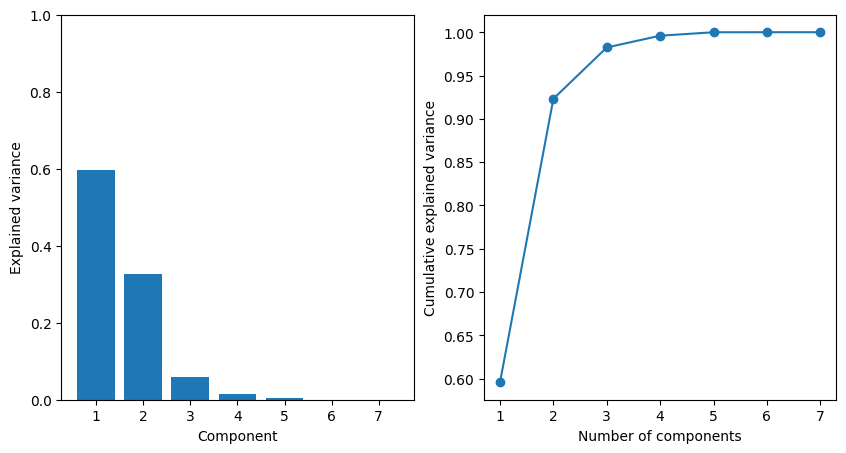

In [18]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(np.arange(1, len(explained_var)+1), explained_var)
plt.ylim(0, 1)
plt.xlabel('Component')
plt.ylabel('Explained variance')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(explained_var)+1), np.cumsum(explained_var), 'o-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Step 4: Compute eigenvectors & sort them

In [19]:
eigen_values, eigen_vectors = np.linalg.eig(C)
idx = eigen_values.argsort()[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]
# top 2 components
eigen_vectors[:, 0].round(3), eigen_vectors[:, 1].round(3)

(array([ 0.065,  0.379,  0.447,  0.472,  0.436, -0.425,  0.244]),
 array([ 0.628,  0.27 , -0.234,  0.111, -0.202, -0.32 , -0.567]))

Step 5: Project data onto the first two principal components

In [20]:
X_pca = (eigen_vectors[:,:2].T @ X.T).T
# or
X_pca = X @ eigen_vectors[:,:2]
X_pca

,0,1
0,5.001985,-2.674746
1,5.015375,-2.525076
2,4.797424,-2.669240
3,4.462088,-2.281218
4,4.464433,-2.155551
...,...,...
295,-0.534616,0.529957
296,-0.339070,0.242824
297,-0.645354,0.514574
298,-0.863635,0.920253


Step 6: Plot the projected data

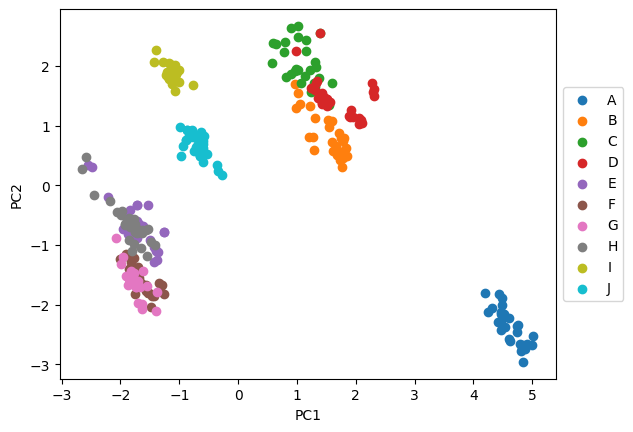

In [21]:
for brand in df['brand'].unique():
    X_pca_selected = X_pca[df['brand']==brand]
    plt.scatter(X_pca_selected[0], X_pca_selected[1], label=brand)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Plot also the contribution of each original feature to the first two principal components

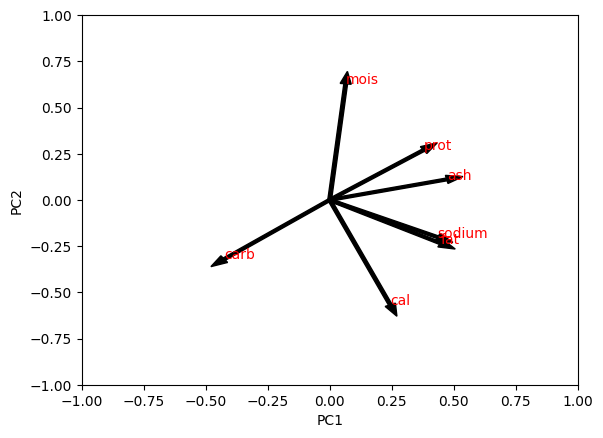

In [22]:
for i in range(7):
    plt.arrow(0, 0, eigen_vectors[i,0], eigen_vectors[i,1], color='k', width=0.015)
    plt.text(eigen_vectors[i,0], eigen_vectors[i,1], X.columns[i], color='r')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

---

Do the same with `PCA` from `sklearn.decomposition`.

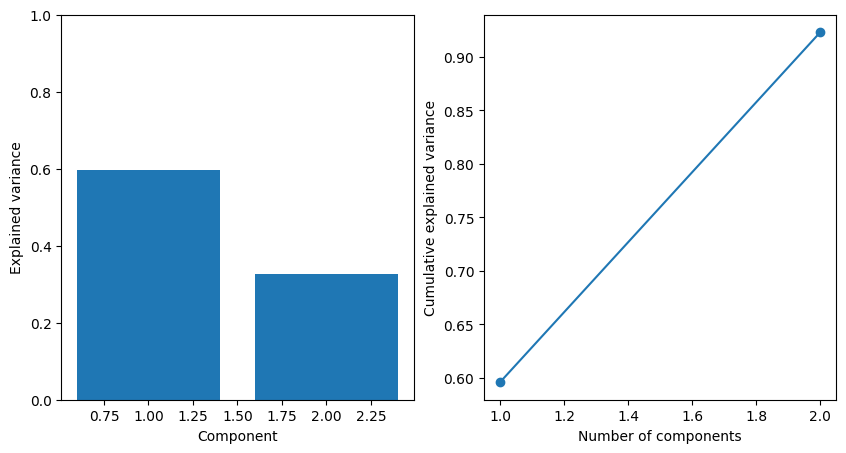

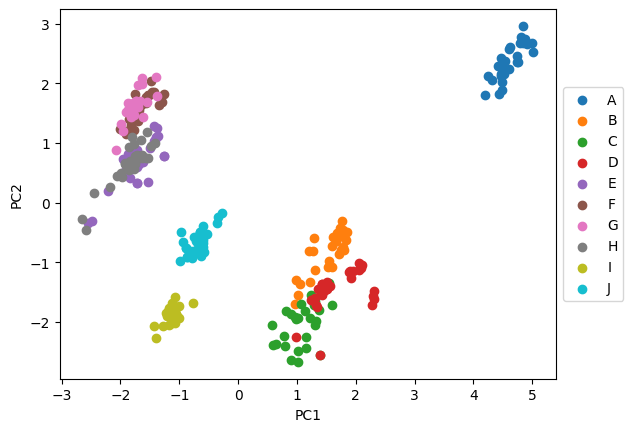

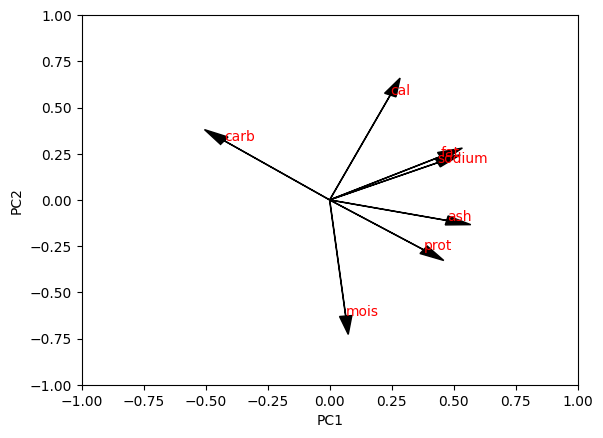

In [23]:
from sklearn.decomposition import PCA

# read
df = pd.read_csv('pizza.csv')
# select columns of interest
X = df[['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']]
# standardize
means = X.mean(axis=0)
stds = X.std(axis=0)
X = (X - means) / stds

# do PCA on X
pca = PCA(n_components=2)
pca.fit(X)

# get the principal components
components = pca.components_
# get the variance explained by each component
explained_ratio = pca.explained_variance_ratio_

# plot the variance explained by each component
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(np.arange(1, len(explained_ratio)+1), explained_ratio)
plt.ylim(0, 1)
plt.xlabel('Component')
plt.ylabel('Explained variance')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(explained_ratio)+1), np.cumsum(explained_ratio), 'o-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# transform data
X_transformed = pca.transform(X)

# plot the transformed data
for brand in df['brand'].unique():
    plt.scatter(X_transformed[df['brand']==brand,0], X_transformed[df['brand']==brand,1], label=brand)
# legend outside the plot
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# plot the original basis vectors
for i in range(7):
    plt.arrow(0, 0, components.T[i,0], components.T[i,1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.text(components.T[i,0], components.T[i,1], X.columns[i], color='r')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The two methods do not give exactly the same results. Why?

In [24]:
components.round(3)

array([[ 0.065,  0.379,  0.447,  0.472,  0.436, -0.425,  0.244],
       [-0.628, -0.27 ,  0.234, -0.111,  0.202,  0.32 ,  0.567]])

In [25]:
eigen_vectors[:,:2].T.round(3)

array([[ 0.065,  0.379,  0.447,  0.472,  0.436, -0.425,  0.244],
       [ 0.628,  0.27 , -0.234,  0.111, -0.202, -0.32 , -0.567]])

if $\vec{u}$ is an eigen vector, $-\vec{u}$ is also an eigen vector;<br>
`sklearn`'s `PCA` returns the eigen vectors with oposite sign as the ones computed `np.linalg.eig`

---

## On the MNIST dataset

![MNIST database illustration](mnist.png)

The MNIST database (Modified National Institute of Standards and Technology database) is a popular database of handwritten digits that is commonly used for training various image processing systems.
It is available from the website of Yann LeCun: http://yann.lecun.com/exdb/mnist/

We will use 10000 images from the test set of the MNIST database.
The images are 28x28 pixels, and each pixel is represented by a number between 0 and 255 (0 is white, 255 is black).

You can get the data in CSV format here:
- Kaggel: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?select=mnist_test.csv
- Google Drive: https://drive.google.com/file/d/1NLZgiKIwEWMOW452Yy6_6fi0AMljQz2p/view?usp=sharing
- GitHub: https://github.com/pauldubois98/RefresherMaths2023/blob/main/ExercisesSet5/mnist10k.csv


The goal of this part is to see how we can use principal component analysis to compress data.

![Compression illustration](compress.png)

Load the `mnist10k.csv` dataset.
Split the labels from the pixels values.

In [26]:
# load data
df = pd.read_csv('mnist10k.csv', sep=',')
df.head()
X = df.drop('label', axis=1)
Y = df['label']
X.shape, Y.shape

((10000, 784), (10000,))

Plot one of the images

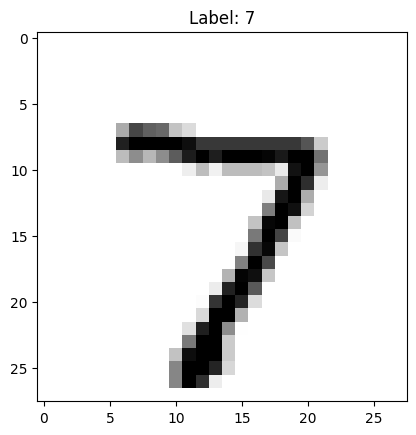

In [27]:
# plot the first image
plt.imshow(X[0:1].values.reshape(28,28), cmap='gray_r')
plt.title(f'Label: {Y[0]}')
plt.show()

Standardize the data to have zero mean and unit variance

In [28]:
# standardize
means = X.mean(axis=0)
stds = X.std(axis=0)
X_STD = (X - means) / stds
X_STD.fillna(0, inplace=True)

Perfom PCA on the data with `sklearn.decomposition.PCA`

In [29]:
# do PCA on X
pca = PCA(n_components=28*28)
pca.fit(X_STD)

PCA(n_components=784)

Plot the cumulative explained variance ratio, choose a number of components that explains at least $70\%$ of the variance

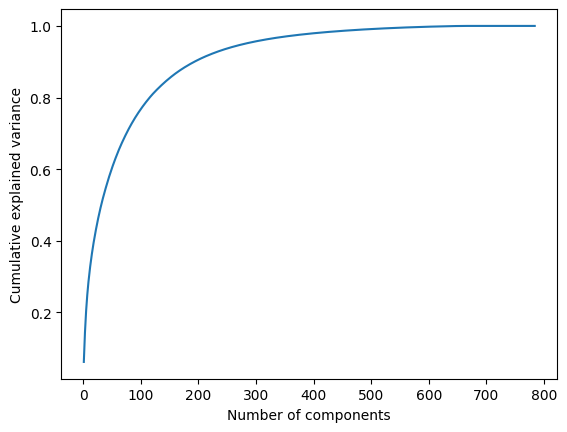

In [30]:
# get the variance explained by each component
explained_ratio = pca.explained_variance_ratio_

# plot the cumulative variance explained
plt.plot(np.arange(1, len(explained_ratio)+1), np.cumsum(explained_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

$\approx 100$ components are needed to explain $70\%$ of the variance

Perfom a new PCA on the data with `sklearn.decomposition.PCA` with $100$ components

In [31]:
# do PCA on X_STD
pca = PCA(n_components=100)
pca.fit(X_STD)

PCA(n_components=100)

Transform the data with the new PCA

In [32]:
# transform data
X_TRANSFORMED = pca.transform(X_STD)

Reconstruct the data from the transformed data

In [33]:
# reconstruct data
X_RECONSTRUCTED_STD = pca.inverse_transform(X_TRANSFORMED)
# reapply the mean and std; clip to [0, 255]; convert to uint8
X_RECONSTRUCTED = (X_RECONSTRUCTED_STD * np.array(stds) + np.array(means)).clip(0, 255).astype(np.uint8)

Plot the first 5 images and their reconstruction

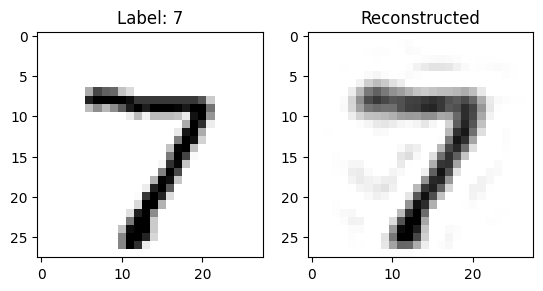

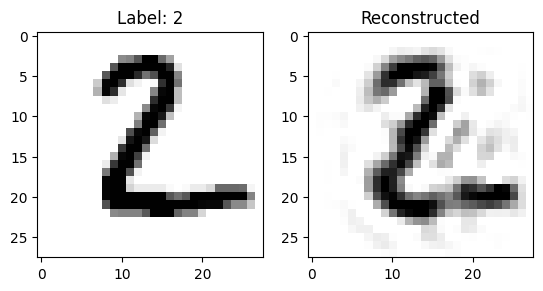

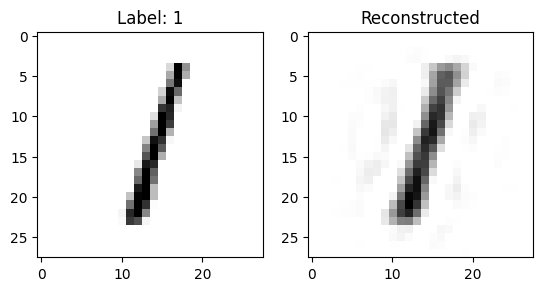

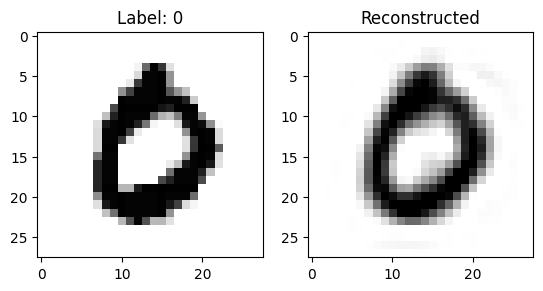

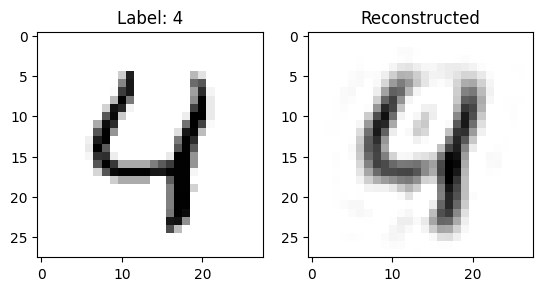

In [34]:
for n in range(5):
    # plot the n-th image and its reconstruction
    plt.subplot(1, 2, 1)
    plt.imshow(X[n:n+1].values.reshape(28,28), cmap='gray_r')
    plt.title(f'Label: {Y[n]}')
    plt.subplot(1, 2, 2)
    plt.imshow(X_RECONSTRUCTED[n:n+1].reshape(28,28), cmap='gray_r')
    plt.title('Reconstructed')
    plt.show()

Try 30 components, and 300 components. What do you observe?

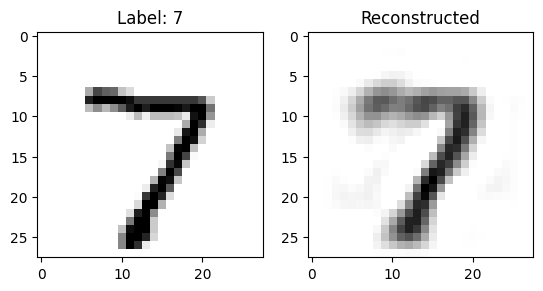

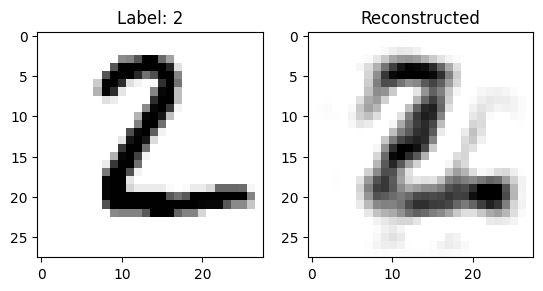

In [35]:
# do PCA on X_STD
pca = PCA(n_components=30)
pca.fit(X_STD)

# transform data
X_TRANSFORMED = pca.transform(X_STD)

# reconstruct data
X_RECONSTRUCTED_STD = pca.inverse_transform(X_TRANSFORMED)
# reapply the mean and std; clip to [0, 255]; convert to uint8
X_RECONSTRUCTED = (X_RECONSTRUCTED_STD * np.array(stds) + np.array(means)).clip(0, 255).astype(np.uint8)

for n in range(2):
    # plot the n-th image and its reconstruction
    plt.subplot(1, 2, 1)
    plt.imshow(X[n:n+1].values.reshape(28,28), cmap='gray_r')
    plt.title(f'Label: {Y[n]}')
    plt.subplot(1, 2, 2)
    plt.imshow(X_RECONSTRUCTED[n:n+1].reshape(28,28), cmap='gray_r')
    plt.title('Reconstructed')
    plt.show()

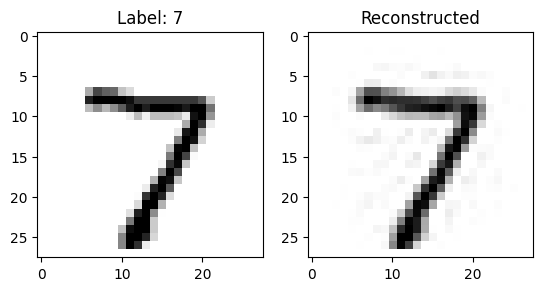

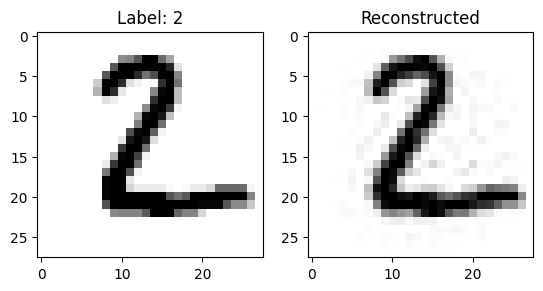

In [36]:
# do PCA on X_STD
pca = PCA(n_components=300)
pca.fit(X_STD)

# transform data
X_TRANSFORMED = pca.transform(X_STD)

# reconstruct data
X_RECONSTRUCTED_STD = pca.inverse_transform(X_TRANSFORMED)
# reapply the mean and std; clip to [0, 255]; convert to uint8
X_RECONSTRUCTED = (X_RECONSTRUCTED_STD * np.array(stds) + np.array(means)).clip(0, 255).astype(np.uint8)

for n in range(2):
    # plot the n-th image and its reconstruction
    plt.subplot(1, 2, 1)
    plt.imshow(X[n:n+1].values.reshape(28,28), cmap='gray_r')
    plt.title(f'Label: {Y[n]}')
    plt.subplot(1, 2, 2)
    plt.imshow(X_RECONSTRUCTED[n:n+1].reshape(28,28), cmap='gray_r')
    plt.title('Reconstructed')
    plt.show()

---

## Application: Genes map Europe
This is an example of a nice application of principal component analysis.

1. Take the DNA genes of Europeans
2. Look at the single nucleotide polymorphism to get an encoding of the DNA of each individual
3. Use PCA to project the individuals in a 2D space
4. Plot the individuals in the 2D space

If you filter out the individuals that have mixed origins, you get the following:

![Genes map Europe](genes_map_europe.png)

More details here: https://www.nature.com/articles/nature07331